## Load Stuff

In [7]:
import torch
from mario_gpt import MarioDataset, MarioLM, TrainingConfig, MarioGPTTrainer
from mario_gpt.utils import view_level, convert_level_to_png, join_list_of_list, characterize
from mario_gpt.flower_level import FLOWER_LEVEL


In [8]:
#---
# load model and generate levels
#---

mario_lm = MarioLM(lm_path="../FlowerGPT", tokenizer_path="../FlowerGPT")
dataset = MarioDataset(mario_lm.tokenizer, level_string=FLOWER_LEVEL)
prompts = [" "]
generated_level = mario_lm.sample(
    prompts=prompts,
    num_steps=140,
    temperature=2.0,
    use_tqdm=True
)
A = generated_level.level_tensor
view_level(A, mario_lm.tokenizer)
print("done")

Using ../FlowerGPT lm


/home/gaiera/anaconda3/envs/nzb-gpt/lib/python3.9/site-packages/transformers-4.27.3-py3.9.egg/transformers/models/auto/modeling_auto.py:1295: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


Using ../FlowerGPT tokenizer


Token indices sequence length is longer than the specified maximum sequence length for this model (14000 > 1024). Running this sequence through the model will result in indexing errors


shape: torch.Size([1, 10]), torch.Size([1, 11]) first: 56, last: 36:   5%|████▋                                                                                         | 7/140 [00:00<00:02, 64.34it/s]

Height: 14


shape: torch.Size([1, 140]), torch.Size([1, 141]) first: 56, last: 34: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:03<00:00, 35.33it/s]


REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x7FF8C42FF580> (0, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x7FF8C42FF580> (1, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x7FF8C42FF580> (2, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x7FF8C42FF580> (3, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x7FF8C42FF580> (4, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x7FF8C42FF580> (5, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x7FF8C42FF580> (6, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x7FF8C42FF580> (7, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x7FF8C42FF580> (8, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x7FF8C42FF580> (9, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image m

In [ ]:
BASE = "distilgpt2"

In [ ]:
mario_lm = MarioLM(lm_path=BASE, tokenizer_path=BASE)

### Load Dataset (Optional)

In [7]:
from mario_gpt.level import FULL_LEVEL_STR_WITH_PATHS
from mario_gpt.flowers_level import FLOWERS_LEVEL_STR_WITH_PATHS

dataset = MarioDataset(mario_lm.tokenizer, level_string=FULL_LEVEL_STR_WITH_PATHS)
dataset = MarioDataset(mario_lm.tokenizer, level_string=FLOWERS_LEVEL_STR_WITH_PATHS)

ModuleNotFoundError: No module named 'mario_gpt.flowers_level'

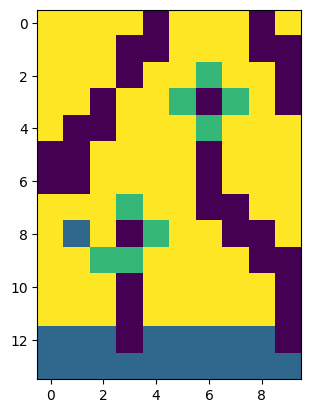

In [28]:
import numpy as np
import matplotlib.pyplot as plt

rot_img = np.rot90(A.reshape(10,14))
rot_img[-1][0] = 34
plt.imshow(rot_img)


In [30]:
(view_level(dataset.input_ids[:700], dataset.tokenizer))

['--------------------------------------------------',
 '--------------------------------------------------',
 '--------------------------------------------------',
 '--------------------------------------------------',
 '-------------------------------------------------o',
 '--------XSSSSS---------------------------------SSS',
 '--------X-----------------------------------------',
 '--------X-----------------------------------------',
 '-------EX--E-X---------------xxxx-?-----------xxxx',
 '--------XSS?SX---QQ?QQ------xx<>-x-----------xx--?',
 '---------------------------xx-[]--x---------xx----',
 '--------------------------xx--[]---x-------xx-----',
 'xxxxxxxxxxxxxxxxxxxxxxxxxxx---[]----xxxxxxxx------',
 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---XXX']

/home/gaiera/anaconda3/envs/nzb-gpt/lib/python3.9/site-packages/Pillow-9.4.0-py3.9-linux-x86_64.egg/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


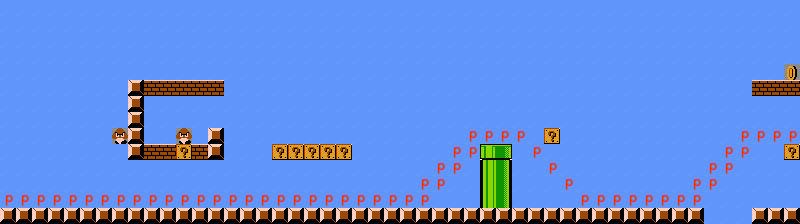

In [31]:
img = convert_level_to_png(dataset.input_ids[:700],  dataset.tokenizer)[0]
img

### Setup training

In [32]:
config = TrainingConfig(save_iteration=10)

In [33]:
trainer = MarioGPTTrainer(mario_lm, dataset, config=config)

/home/gaiera/anaconda3/envs/nzb-gpt/lib/python3.9/site-packages/transformers-4.27.3-py3.9.egg/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/home/gaiera/anaconda3/envs/nzb-gpt/lib/python3.9/site-packages/accelerate/accelerator.py:249: FutureWarning: `logging_dir` is deprecated and will be removed in version 0.18.0 of 🤗 Accelerate. Use `project_dir` instead.
  warnings.warn(
/home/gaiera/anaconda3/envs/nzb-gpt/lib/python3.9/site-packages/accelerate/accelerator.py:359: UserWarning: `log_with=tensorboard` was passed but no supported trackers are currently installed.
  warnings.warn(f"`log_with={log_with}` was passed but no supported trackers are currently installed.")


In [ ]:
trainer.train(1000, batch_size=1)

shape: torch.Size([1, 280]), torch.Size([1, 281]) first: 55, last: 13: 100%|████████████████████| 280/280 [00:02<00:00, 128.52it/s]


REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x7FFB149AE6A0> (0, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x7FFB149AE6A0> (1, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x7FFB149AE6A0> (2, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x7FFB149AE6A0> (3, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x7FFB149AE6A0> (4, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x7FFB149AE6A0> (5, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x7FFB149AE6A0> (6, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x7FFB149AE6A0> (7, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x7FFB149AE6A0> (8, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x7FFB149AE6A0> (9, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image m

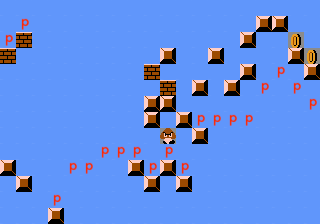

In [81]:
prompts = [" "]
generated_level = mario_lm.sample(
    prompts=prompts,
    num_steps=280,
    temperature=1.0,
    use_tqdm=True
)

img = convert_level_to_png(generated_level.level_tensor,  dataset.tokenizer)[0]
img

REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x7FFB14AFD880> (0, 13)


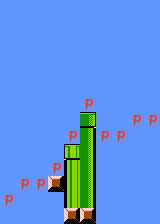

In [75]:
img = convert_level_to_png(A.level_tensor,  dataset.tokenizer)[0]
img

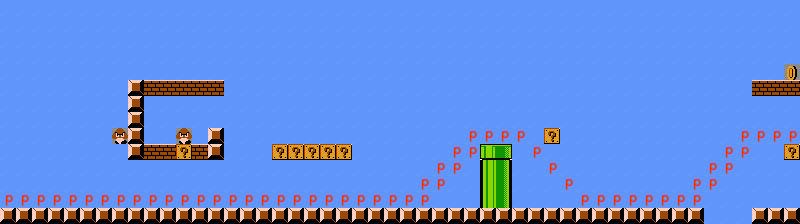

In [72]:
img = convert_level_to_png(dataset.input_ids[:700],  dataset.tokenizer)[0]
img